In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Korisnik\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


<Axes: xlabel='job_skills'>

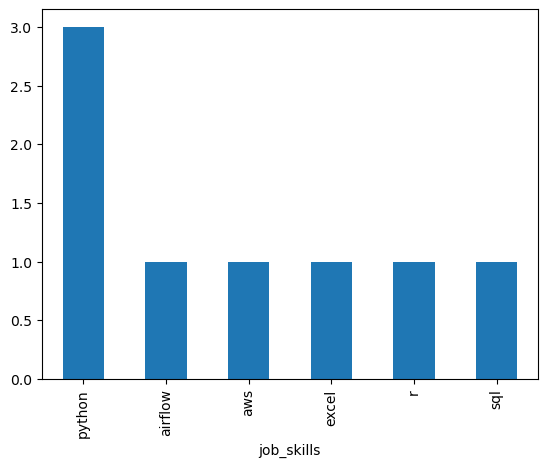

In [5]:
df_skills.explode('job_skills').value_counts('job_skills').plot(kind='bar')

In [6]:
# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [10]:
# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode('job_skills')

In [14]:
skills_count = df_exploded.groupby(['job_skills','job_title_short']).size()

In [19]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


<Axes: xlabel='job_skills'>

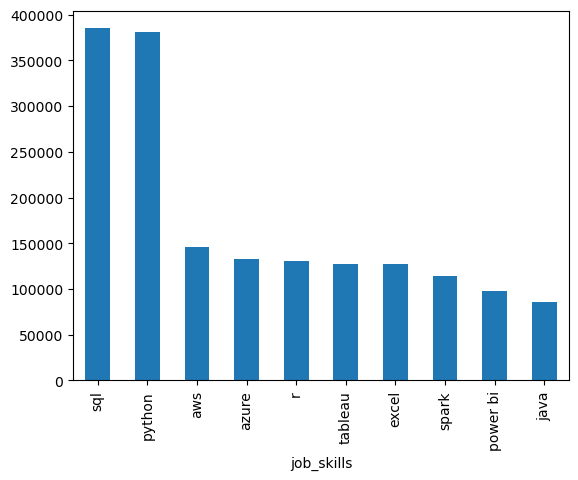

In [9]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

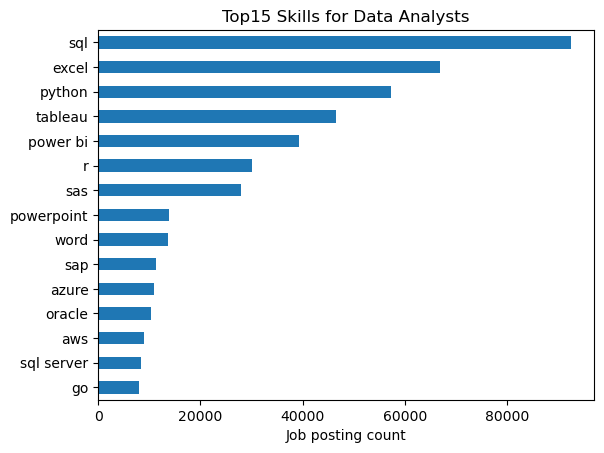

In [30]:
job_title = 'Data Analyst'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')

plt.gca().invert_yaxis()
plt.title(f'Top{top_skills} Skills for {job_title}s')
plt.xlabel('Job posting count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()